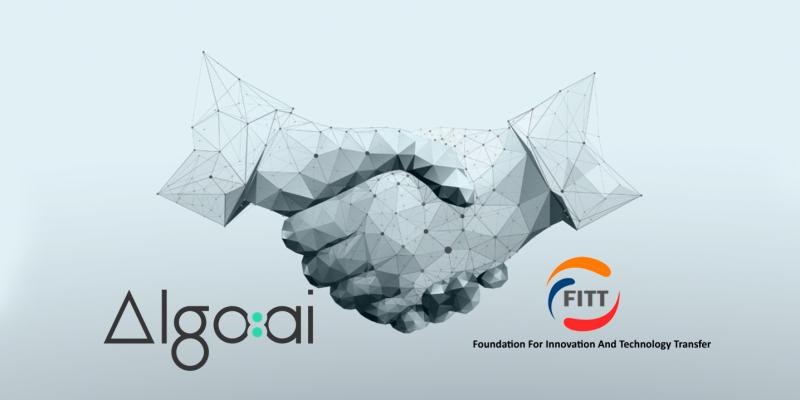

# Data Cleaning

# Delinquency Telecom Model

## Context`

Delinquency is a condition that arises when an activity or situation does not occur at its scheduled (or expected) date i.e., it occurs later than expected.

## Content

Many donors, experts, and microfinance institutions (MFI) have become convinced that using mobile financial services (MFS) is more convenient and efficient, and less costly, than the traditional high-touch model for delivering microfinance services. MFS becomes especially useful when targeting the unbanked poor living in remote areas. The implementation of MFS, though, has been uneven with both significant challenges and successes. Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

## Data Description

A Telecom collaborates with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be delinquent if he deviates from the path of paying back the loaned amount within 5 days. The sample data from our client database is hereby given to you for the exercise.

## Exercise

Create a delinquency model which can predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan (Label ‘1’ & ’0’)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sample_data_intw.csv',index_col=0)
df.head(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

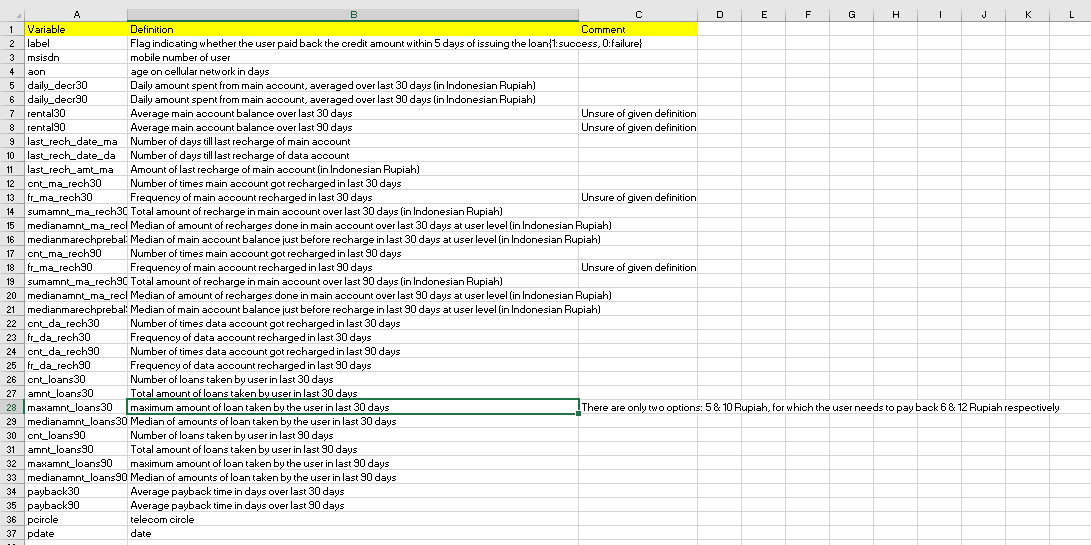

In [4]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

So, there are no null values present here

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

# 1. msisdn : mobile number of user

In [6]:
df['msisdn'].value_counts()

04581I85330    7
47819I90840    7
30080I90588    6
55809I89238    6
22038I88658    6
              ..
36902I90840    1
17447I88689    1
59686I90584    1
00504I91190    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64

In msisdn (mobile number of user) 'I' is present between numbers

The alphabet I should not be present as it is a mobile number

In [7]:
df['msisdn']=df['msisdn'].replace(regex=True, to_replace=['I'],value='')

In [8]:
df['msisdn'] = pd.to_numeric(df['msisdn'])

In [9]:
df['msisdn'].dtype

dtype('int64')

In [10]:
df['msisdn'].value_counts()

458185330     7
4781990840    7
3008090588    6
5580989238    6
2203888658    6
             ..
3690290840    1
1744788689    1
5968690584    1
50491190      1
6506185339    1
Name: msisdn, Length: 186243, dtype: int64

# 2. pdate: date

In [11]:
df['pdate'].value_counts()

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64

In [12]:
df['pdate'].dtype

dtype('O')

Firstly, we need to change the data type to date

In [13]:
df['pdate'] = pd.to_datetime(df['pdate'])

In [14]:
df['pdate'].dtype

dtype('<M8[ns]')

Now, changing the date format

In [15]:
df['pdate']= df['pdate'].dt.strftime("%y-%m-%d")

In [16]:
df['pdate'].value_counts()

16-07-04    3150
16-07-05    3127
16-07-07    3116
16-06-20    3099
16-06-17    3082
            ... 
16-06-04    1559
16-08-18    1407
16-08-19    1132
16-08-20     788
16-08-21     324
Name: pdate, Length: 82, dtype: int64

# Saving the cleaned data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  int64  
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [18]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [19]:
# Export cleaned Data
df.to_csv("Project-Cleaned Data.csv")

In [20]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,16-07-20
2,1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,16-08-10
3,1,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,16-08-19
4,1,5577370781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,16-06-06
5,1,381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,16-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,1,2275885348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,16-06-17
209590,1,9558384455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,16-06-12
209591,1,2855685350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,16-07-29
209592,1,5971282733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,16-07-25


In [21]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,2.095930e+05,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,4.974956e+09,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,2.890571e+09,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,4.827380e+05,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.465991e+09,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,4.905684e+09,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,7.503370e+09,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,9.999895e+09,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


# EDA

In [22]:
lst = [df]
for column in lst:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'

In [23]:
count_balance_response_pct = pd.crosstab(df['label'],df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [24]:
bal = pd.DataFrame(df['balance_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

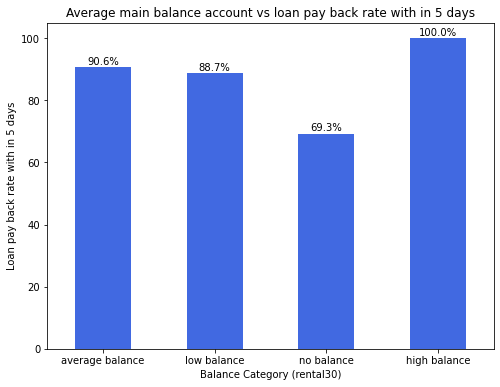

In [25]:
plot_balance = bal['% Subscription'].plot(kind = 'bar',
                                               color = ('royalblue'),
                                               figsize = (8,6))

plt.title('Average main balance account vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Balance Category (rental30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

The above bar plot infers us how customers with different main balance levels are paying back the loan with in five days. The high balance level people are with 100% rate i.e they are paying loan within 5 days. Coming to the average and low balance people it is observed that around 10%-12% of people are not paying the loan within 5 days.

Coming to low balance level people, it is observed that around 30% of people are not paying back the loan with in stipulated 5 days of time. The 30% of people with no balance or negative balance people are creating a major loss to the company without paying back the loan within five days of time.

In order to decrease loss to the company, the company should start some marketing strategies like sms alerting and notifications and others on the people with no balance, average and high balance level people notifying them to pay the loan back within five days of time

In [26]:
lst = [df]
for column in lst:
    column.loc[column["fr_ma_rech30"] <=0,  'frequency_group'] = 'no frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <=1 ), 'frequency_group'] = 'low frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] <=2), 'frequency_group'] = 'medium frequency'
    column.loc[(column['fr_ma_rech30'] >2), 'frequency_group'] = 'high frequency'

In [27]:
count_fre_response_pct = pd.crosstab(df['label'],df['frequency_group']).apply(lambda x: x/x.sum() * 100)
count_fre_response_pct = count_fre_response_pct.transpose()

In [28]:
fre = pd.DataFrame(df['frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_fre_response_pct[1]
fre.drop('frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

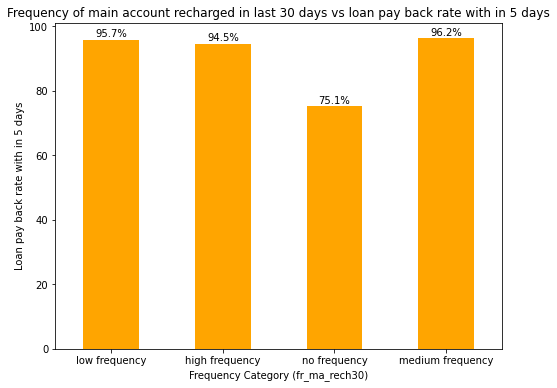

In [29]:
plot_fre = fre['% Subscription'].plot(kind = 'bar',
                                               color = ('orange'),
                                               figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')


The above bar plot infers us how customers with different frequency levels (main account recharge) are paying back the loan within five days. The is no 100% rate in any of the frequency levels to pay back the loan within 5 days. Coming to the average and low & medium frequency people it is observed that around 5%-6% of people are not paying the loan within 5 days.

Coming to low frequency level people, it is observed that around 25% of people are not paying back the loan with in stipulated 5 days of time. The 25% people who are not getting their main account recharge for 30 days creating a major loss to the company without paying back the loan within five days of time.

In order to decrease loss to the company, the company should start some marketing strategies like sms alerting and notifications and others on the people with all frequency levels and especially on no frequency level people notifying them to pay the loan back within five days of time

In [30]:
lst = [df]
for column in lst:
    column.loc[column["cnt_loans30"] <=0,  'loan_frequency_group'] = 'no loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'low num of loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_frequency_group'] = 'medium num of loans'
    column.loc[(column['cnt_loans30'] >4), 'loan_frequency_group'] = 'high num of loans'

In [31]:
count_loan_response_pct = pd.crosstab(df['label'],df['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loan_response_pct = count_loan_response_pct.transpose()

In [32]:
fre = pd.DataFrame(df['loan_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_loan_response_pct[1]
fre.drop('loan_frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

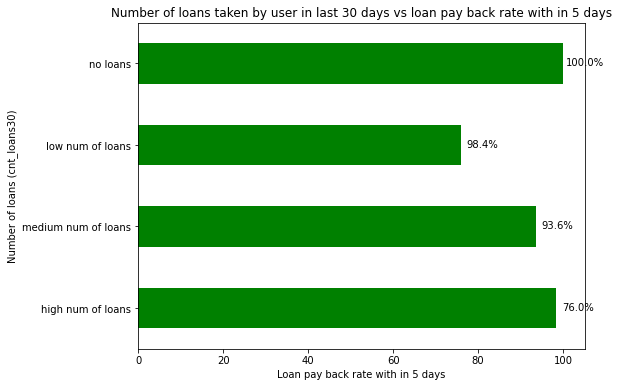

In [33]:
plot_fre = fre['% Subscription'].plot(kind = 'barh',
                                               color = ('green'), figsize = (8,6))

plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Number of loans (cnt_loans30)')
plt.xlabel('Loan pay back rate with in 5 days')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).sort_values(ascending = True).round(1).astype(str)):
    plot_fre.text(rec.get_width()+5, 
                  rec.get_y()+ rec.get_height()-0.3, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

The above bar plot infers us how customers with different loans levels taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.

Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the high number of loan level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people from low number of loans category are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.

In order to decrease loss to the company, the company should start some marketing strategies like sms alerting and notifications and others on the people with all loan levels and especially on low & high level people notifying them to pay the loan back within five days of time

In [34]:
lst = [df]
for column in lst:
    column.loc[column["amnt_loans30"] <=0,  'loanamnt_frequency_group'] = 'no loans'
    column.loc[(column['amnt_loans30'] > 0) & (column['amnt_loans30'] <=6 ), 'loanamnt_frequency_group'] = 'low amnt of loans'
    column.loc[(column['amnt_loans30'] >6) & (column['amnt_loans30'] <=24), 'loanamnt_frequency_group'] = 'medium amnt of loans'
    column.loc[(column['amnt_loans30'] >24), 'loanamnt_frequency_group'] = 'high amnt of loans'

In [35]:
count_loanamnt_response_pct = pd.crosstab(df['label'],df['loanamnt_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loanamnt_response_pct = count_loanamnt_response_pct.transpose()

In [36]:
fre1 = pd.DataFrame(df['loanamnt_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre1['% Subscription'] = count_loanamnt_response_pct[1]
fre1.drop('loanamnt_frequency_group',axis = 1,inplace = True)

fre1['fre1'] = [1,2,0,3]
fre1= fre1.sort_values('fre1',ascending = True)

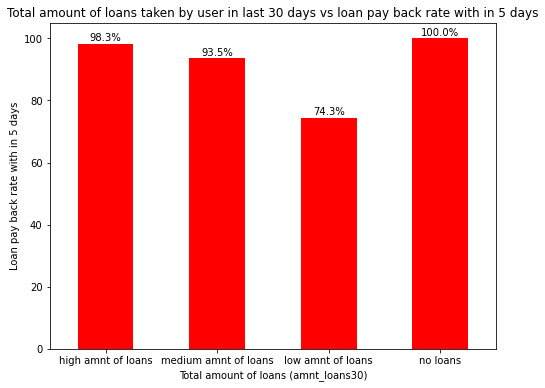

In [37]:
plot_fre1 = fre1['% Subscription'].plot(kind = 'bar',
                                               color = ('red'), figsize = (8,6))

plt.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Total amount of loans (amnt_loans30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre1.patches,
                      fre1['% Subscription'].round(1).astype(str)):
    plot_fre1.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

The above bar plot infers us how customers with different loans levels taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.

Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the low amount level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people taken high amount of loans are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.

In order to decrease loss to the company, the company should start some marketing strategies like sms alerting and notifications and others on the people with all loan levels and especially on low & high level people notifying them to pay the loan back within five days of time.

# Finding Best Model

In [38]:
import warnings 
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('Project-Cleaned Data.csv',index_col=0)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,16-07-20
2,1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,16-08-10
3,1,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,16-08-19
4,1,5577370781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,16-06-06
5,1,381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,16-06-22


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  int64  
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

# Check for the correlation with the dependent variable 'Label

In [41]:
df.corr()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,0.001945,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
msisdn,0.001945,1.000000,0.000555,0.000669,0.000903,-0.001437,-0.000728,-0.000949,0.001404,-0.002356,...,0.001735,0.002138,-0.000761,0.000988,0.001908,-0.000222,0.003283,0.001213,0.002907,0.002655
aon,-0.003785,0.000555,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.000669,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000903,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.001437,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000728,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,-0.000949,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,0.001404,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,-0.002356,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


<AxesSubplot:>

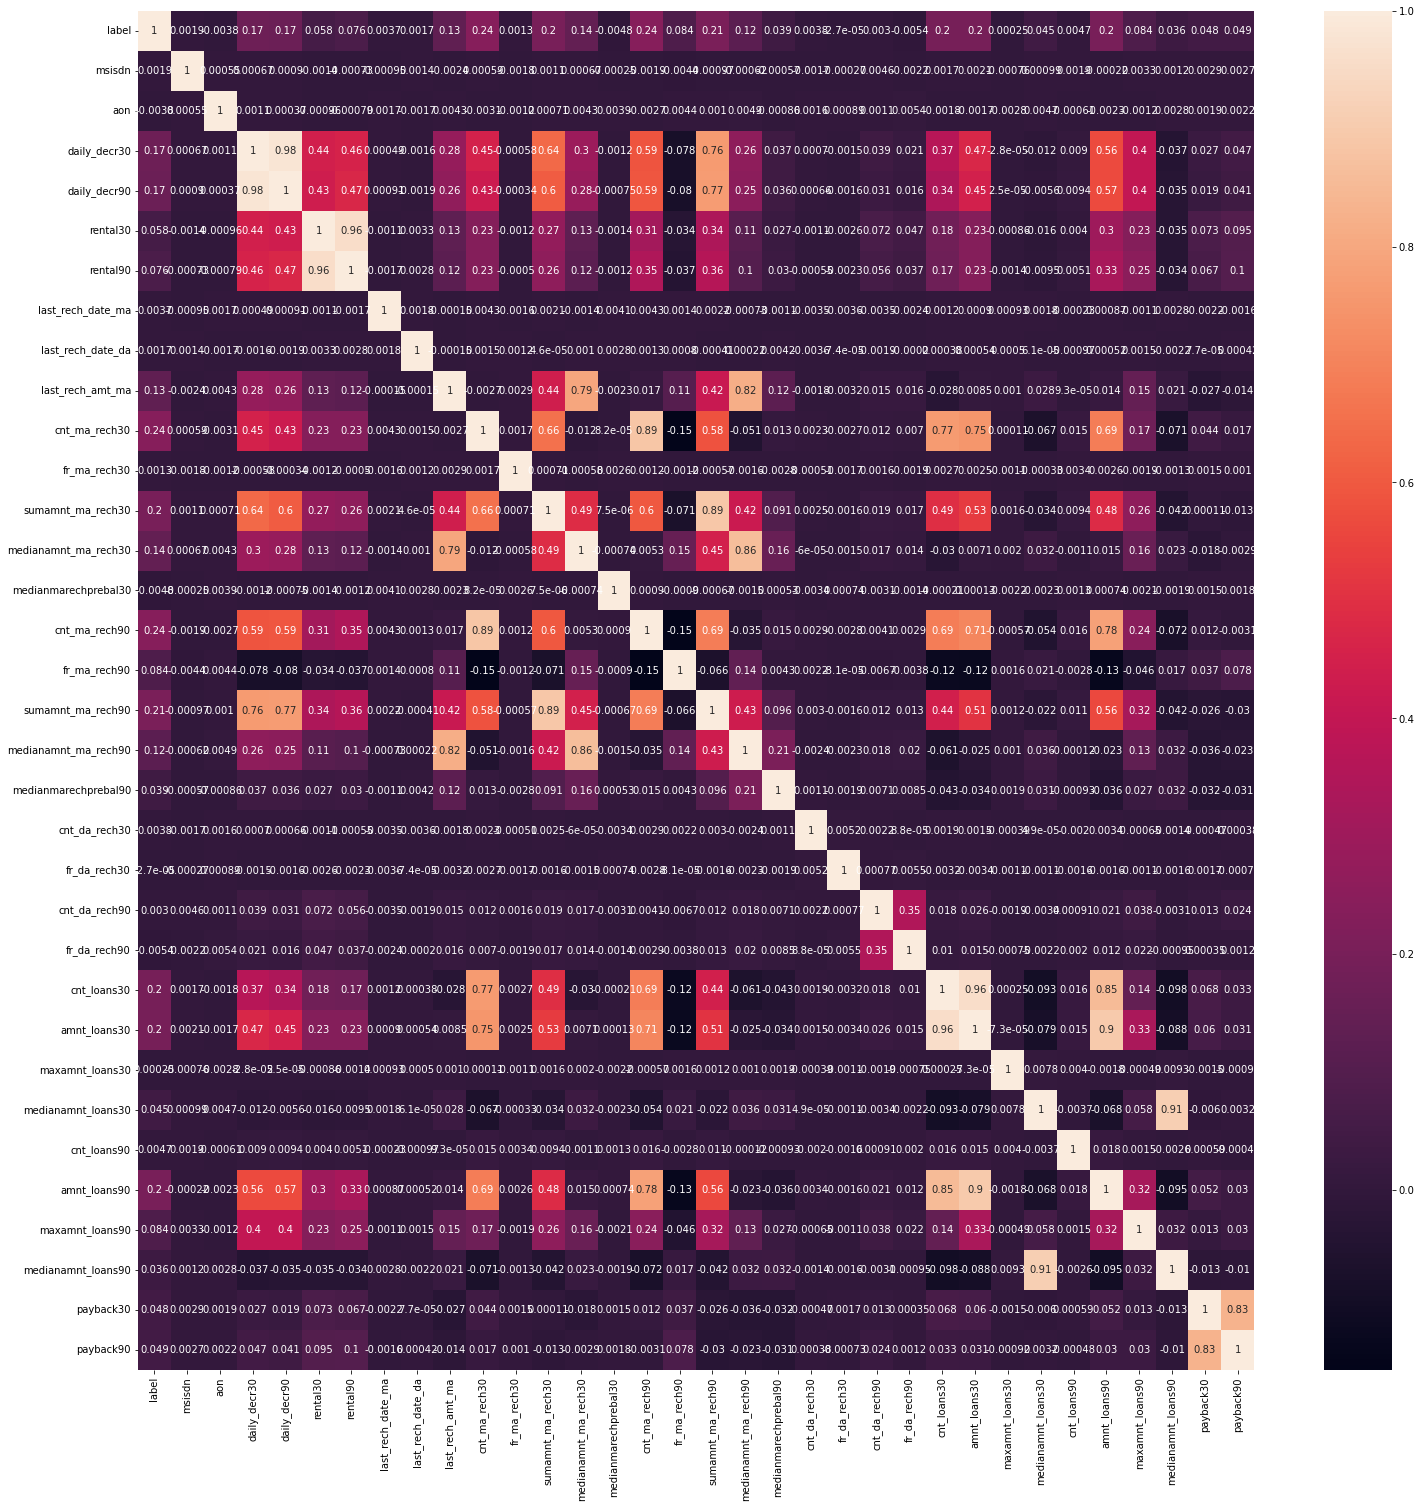

In [42]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True)

In [43]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [44]:
corr_features = correlation(df, 0.5)
len(set(corr_features))

12

These 12 columns will affect our accuracy, so we have removed them

In [45]:
corr_features

{'amnt_loans30',
 'amnt_loans90',
 'cnt_loans30',
 'cnt_ma_rech90',
 'daily_decr90',
 'medianamnt_loans90',
 'medianamnt_ma_rech30',
 'medianamnt_ma_rech90',
 'payback90',
 'rental90',
 'sumamnt_ma_rech30',
 'sumamnt_ma_rech90'}

In [46]:
df_imp = df.drop(corr_features,axis=1)

In [47]:
df_imp = df_imp.drop(columns=['pcircle','pdate','msisdn'], axis=1)

In [48]:
df_imp.head()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,medianmarechprebal30,...,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30
1,0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,7.50,...,7.50,0.0,0.0,0,0,6.0,0.0,2.0,6,29.000000
2,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,61.04,...,61.04,0.0,0.0,0,0,12.0,0.0,1.0,12,0.000000
3,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,66.32,...,66.32,0.0,0.0,0,0,6.0,0.0,1.0,6,0.000000
4,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.00,...,2.50,0.0,0.0,0,0,6.0,0.0,2.0,6,0.000000
5,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,29.00,...,35.00,0.0,0.0,0,0,6.0,0.0,7.0,6,2.333333


In [49]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   last_rech_date_ma     209593 non-null  float64
 5   last_rech_date_da     209593 non-null  float64
 6   last_rech_amt_ma      209593 non-null  int64  
 7   cnt_ma_rech30         209593 non-null  int64  
 8   fr_ma_rech30          209593 non-null  float64
 9   medianmarechprebal30  209593 non-null  float64
 10  fr_ma_rech90          209593 non-null  int64  
 11  medianmarechprebal90  209593 non-null  float64
 12  cnt_da_rech30         209593 non-null  float64
 13  fr_da_rech30          209593 non-null  float64
 14  cnt_da_rech90         209593 non-null  int64  
 15  

In [50]:
df_imp.columns

Index(['label', 'aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'medianmarechprebal30', 'fr_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'maxamnt_loans90', 'payback30'],
      dtype='object')

# Checking the normality of the features

<AxesSubplot:>

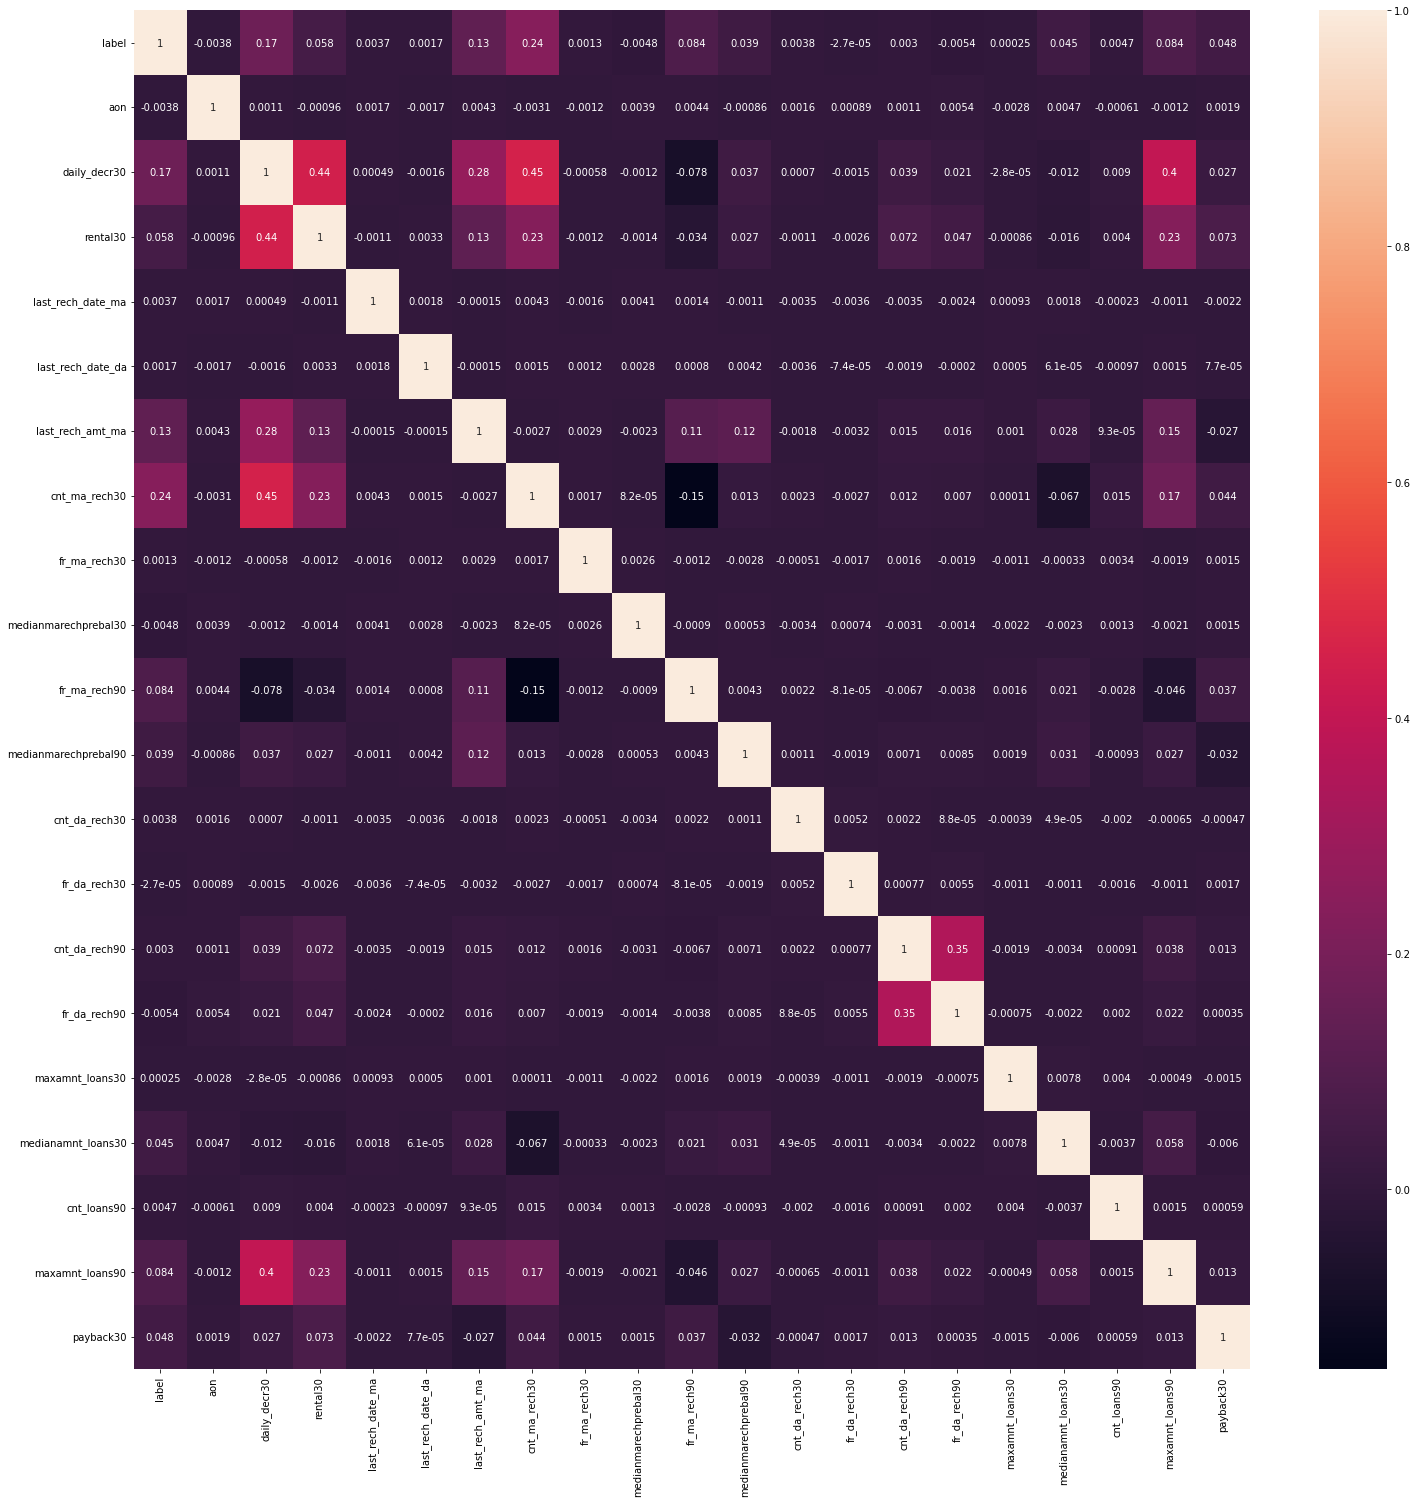

In [51]:
plt.figure(figsize=(25,25))
sns.heatmap(df_imp.corr(), annot=True)

Now the features are nicely correlated

In [52]:
df_imp['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [53]:
df_imp.isnull().sum()

label                   0
aon                     0
daily_decr30            0
rental30                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
medianmarechprebal30    0
fr_ma_rech90            0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
maxamnt_loans90         0
payback30               0
dtype: int64

In [55]:
df_new = pd.read_csv('sample_data_intw.csv',index_col=0)
df_new.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [57]:
df_new.drop(columns=(corr_features),axis=1,inplace=True)

In [58]:
df_new

,label,msisdn,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,...,0.0,0,0,6.0,0.0,2.0,6,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,...,0.0,0,0,12.0,0.0,1.0,12,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,...,0.0,0,0,6.0,0.0,1.0,6,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,...,0.0,0,0,6.0,0.0,2.0,6,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,...,0.0,0,0,6.0,0.0,7.0,6,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,1,22758I85348,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,...,0.0,0,0,6.0,0.0,2.0,6,1.000000,UPW,2016-06-17
209590,1,95583I84455,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,...,0.0,0,0,6.0,0.0,3.0,6,1.000000,UPW,2016-06-12
209591,1,28556I85350,1013.0,11843.111667,5861.83,3.0,0.0,1539,5,8.0,...,0.0,0,0,12.0,0.0,6.0,12,4.000000,UPW,2016-07-29
209592,1,59712I82733,1732.0,12488.228333,411.83,2.0,38.0,773,5,4.0,...,0.0,1,0,12.0,0.0,3.0,12,0.000000,UPW,2016-07-25


In [59]:
df_new.drop(columns=['pcircle','pdate','msisdn'], axis=1,inplace=True)

In [60]:
df_new

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,medianmarechprebal30,...,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30
1,0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,7.50,...,7.50,0.0,0.0,0,0,6.0,0.0,2.0,6,29.000000
2,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,61.04,...,61.04,0.0,0.0,0,0,12.0,0.0,1.0,12,0.000000
3,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,66.32,...,66.32,0.0,0.0,0,0,6.0,0.0,1.0,6,0.000000
4,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.00,...,2.50,0.0,0.0,0,0,6.0,0.0,2.0,6,0.000000
5,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,29.00,...,35.00,0.0,0.0,0,0,6.0,0.0,7.0,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,1,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,91.81,...,91.81,0.0,0.0,0,0,6.0,0.0,2.0,6,1.000000
209590,1,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,161.30,...,111.80,0.0,0.0,0,0,6.0,0.0,3.0,6,1.000000
209591,1,1013.0,11843.111667,5861.83,3.0,0.0,1539,5,8.0,51.13,...,47.13,0.0,0.0,0,0,12.0,0.0,6.0,12,4.000000
209592,1,1732.0,12488.228333,411.83,2.0,38.0,773,5,4.0,164.00,...,100.00,0.0,0.0,1,0,12.0,0.0,3.0,12,0.000000


# Deleting Columns of maximum Zero

In [64]:
df_new['last_rech_date_da'].value_counts()

0.000000         202861
7.000000            163
8.000000            160
11.000000           149
13.000000           148
                  ...  
731116.874493         1
609105.662326         1
945424.253703         1
505559.452693         1
636529.127252         1
Name: last_rech_date_da, Length: 1174, dtype: int64

In [65]:
df_new.drop('last_rech_date_da',axis=1,inplace=True)

In [66]:
df_new['cnt_da_rech30'].value_counts()

0.000000        205479
1.000000          2331
2.000000           372
3.000000           156
4.000000            86
                 ...  
13710.643665         1
84844.562846         1
65385.403518         1
93840.663070         1
61002.421345         1
Name: cnt_da_rech30, Length: 1066, dtype: int64

In [67]:
df_new['fr_da_rech30'].value_counts()

0.000000         208014
3.000000             64
1.000000             55
2.000000             51
7.000000             47
                  ...  
757900.530472         1
870976.477512         1
797647.001920         1
519699.885393         1
509386.302670         1
Name: fr_da_rech30, Length: 1072, dtype: int64

In [68]:
df_new['cnt_da_rech90'].value_counts()

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
13         6
10         6
16         4
18         3
15         2
20         1
25         1
28         1
30         1
22         1
38         1
19         1
27         1
17         1
Name: cnt_da_rech90, dtype: int64

In [69]:
df_new['fr_da_rech90'].value_counts()

0     208728
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
14        32
9         32
11        30
12        27
19        22
28        19
15        17
13        17
18        16
29        15
16        14
17        14
25        11
22        11
21        10
20         9
32         8
24         8
27         8
26         7
30         7
31         6
34         5
37         5
23         5
57         3
35         2
41         2
42         1
39         1
33         1
43         1
56         1
46         1
55         1
64         1
Name: fr_da_rech90, dtype: int64

In [70]:
df_new.drop(columns=['cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90'], axis=1,inplace=True)

These 4 columns contains Maximum of zeros

In [71]:
df_new

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianmarechprebal90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30
1,0,272.0,3055.050000,220.13,2.0,1539,2,21.0,7.50,21,7.50,6.0,0.0,2.0,6,29.000000
2,1,712.0,12122.000000,3691.26,20.0,5787,1,0.0,61.04,0,61.04,12.0,0.0,1.0,12,0.000000
3,1,535.0,1398.000000,900.13,3.0,1539,1,0.0,66.32,0,66.32,6.0,0.0,1.0,6,0.000000
4,1,241.0,21.228000,159.42,41.0,947,0,0.0,0.00,0,2.50,6.0,0.0,2.0,6,0.000000
5,1,947.0,150.619333,1098.90,4.0,2309,7,2.0,29.00,2,35.00,6.0,0.0,7.0,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,1,404.0,151.872333,1089.19,1.0,4048,3,2.0,91.81,2,91.81,6.0,0.0,2.0,6,1.000000
209590,1,1075.0,36.936000,1728.36,4.0,773,4,1.0,161.30,2,111.80,6.0,0.0,3.0,6,1.000000
209591,1,1013.0,11843.111667,5861.83,3.0,1539,5,8.0,51.13,5,47.13,12.0,0.0,6.0,12,4.000000
209592,1,1732.0,12488.228333,411.83,2.0,773,5,4.0,164.00,4,100.00,12.0,0.0,3.0,12,0.000000


In [72]:
df_new.shape

(209593, 16)

In [74]:
x = df_new.drop('label',axis=1)
y = df_new['label']

In [75]:
x

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianmarechprebal90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30
1,272.0,3055.050000,220.13,2.0,1539,2,21.0,7.50,21,7.50,6.0,0.0,2.0,6,29.000000
2,712.0,12122.000000,3691.26,20.0,5787,1,0.0,61.04,0,61.04,12.0,0.0,1.0,12,0.000000
3,535.0,1398.000000,900.13,3.0,1539,1,0.0,66.32,0,66.32,6.0,0.0,1.0,6,0.000000
4,241.0,21.228000,159.42,41.0,947,0,0.0,0.00,0,2.50,6.0,0.0,2.0,6,0.000000
5,947.0,150.619333,1098.90,4.0,2309,7,2.0,29.00,2,35.00,6.0,0.0,7.0,6,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,404.0,151.872333,1089.19,1.0,4048,3,2.0,91.81,2,91.81,6.0,0.0,2.0,6,1.000000
209590,1075.0,36.936000,1728.36,4.0,773,4,1.0,161.30,2,111.80,6.0,0.0,3.0,6,1.000000
209591,1013.0,11843.111667,5861.83,3.0,1539,5,8.0,51.13,5,47.13,12.0,0.0,6.0,12,4.000000
209592,1732.0,12488.228333,411.83,2.0,773,5,4.0,164.00,4,100.00,12.0,0.0,3.0,12,0.000000


In [76]:
y

1         0
2         1
3         1
4         1
5         1
         ..
209589    1
209590    1
209591    1
209592    1
209593    1
Name: label, Length: 209593, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)

In [78]:
print("Shape of X_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (157194, 15)
Shape of y_train:  (157194,)
Shape of X_test:  (52399, 15)
Shape of y_test:  (52399,)


### Scaling the X_train and transform it to both X_test and X_train

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [80]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [81]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5],
            'criterion': ["gini","entropy"]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5],
            "penalty": ["l1","l2"]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy']
        }
    },
    "KNN Classifier":{
        'model': KNeighborsClassifier(),
        'params':{
            "n_neighbors": [1,5],
            "metric" : ["euclidean",'chebyshev']
        }
    }
    
}

In [83]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(x_train_scaled[0:10000,:], y_train[0:10000])
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_check = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_check

,model,best_score,best_params
0,random_forest,0.897199,"{'criterion': 'gini', 'n_estimators': 5}"
1,logistic_regression,0.874300,"{'C': 5, 'penalty': 'l1'}"
2,decision_tree,0.856999,{'criterion': 'entropy'}
3,KNN Classifier,0.881000,"{'metric': 'euclidean', 'n_neighbors': 5}"


#### Random Forest is the Hero of all

In [84]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

### Using SMOTE To balance the Label i.e the dependent variable

In [85]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0    183431
1    183431
Name: label, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [87]:
X_train_sample = X_train_sm.iloc[0:10000,:]
y_train_sample = y_train_sm.iloc[0:10000,]
print("Shape of X_train_sample: ",X_train_sample.shape)
print("Shape of y_train_sample: ",y_train_sample.shape)

Shape of X_train_sample:  (10000, 15)
Shape of y_train_sample:  (10000,)


In [88]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train_sample, y_train_sample)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_check = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_check

,model,best_score,best_params
0,random_forest,0.839299,"{'criterion': 'entropy', 'n_estimators': 5}"
1,logistic_regression,0.769000,"{'C': 1, 'penalty': 'l1'}"
2,decision_tree,0.831300,{'criterion': 'entropy'}
3,KNN Classifier,0.692999,"{'metric': 'euclidean', 'n_neighbors': 1}"


# Both the DataFrame Give the maximum score for Random Forest

# Applying the best model i.e RandomForest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
clf = RandomForestClassifier(n_estimators = 100)

In [91]:
a = 50000
clf.fit(x_train_scaled[0:a,:], y_train[0:a])
 
# performing predictions on the test dataset
y_pred = clf.predict(x_test_scaled[0:a,:])
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test[0:a], y_pred))


ACCURACY OF THE MODEL:  0.90966


### Accuracy of our model is 90%

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [93]:
print(classification_report(y_test[0:a],y_pred))

              precision    recall  f1-score   support

           0       0.77      0.40      0.53      6299
           1       0.92      0.98      0.95     43701

    accuracy                           0.91     50000
   macro avg       0.85      0.69      0.74     50000
weighted avg       0.90      0.91      0.90     50000



In [94]:
cm = confusion_matrix(y_test[0:a],y_pred)
print(cm)

[[ 2520  3779]
 [  738 42963]]


In [95]:
probability = clf.predict_proba(x_test_scaled)

In [96]:
probability

array([[0.  , 1.  ],
       [0.62, 0.38],
       [0.11, 0.89],
       ...,
       [0.  , 1.  ],
       [0.07, 0.93],
       [0.01, 0.99]])

In [101]:
df_final = pd.concat([x_test,y_test],axis=1)

In [109]:
df_final

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianmarechprebal90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,label
89747,1197.0,140.849333,2815.12,7.0,2309,6,1.0,255.80,40,198.80,6.0,0.0,4.0,6,2.000000,1
179840,338.0,-46.215000,10612.08,62.0,11927,0,0.0,0.00,0,2.30,6.0,0.0,1.0,6,0.000000,1
152210,244.0,6549.680000,3108.65,3.0,1539,2,3.0,28.00,3,6.00,6.0,0.0,2.0,6,0.000000,1
88487,834.0,7109.000000,699.95,3.0,1539,4,0.0,14.87,0,26.03,6.0,0.0,18.0,6,7.250000,1
43139,155.0,8096.000000,4066.69,1.0,1924,4,8.0,21.00,8,21.00,6.0,0.0,3.0,6,6.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149127,179.0,515.466667,913.01,1.0,770,3,11.0,31.00,11,31.00,6.0,0.0,2.0,6,34.000000,0
64669,114.0,72.880000,836.60,4.0,770,5,12.0,154.00,32,141.00,6.0,0.0,1.0,6,0.000000,1
54090,1587.0,134.070000,796.86,-15.0,8000,2,30.0,580.25,30,580.25,6.0,0.0,2.0,6,0.000000,1
158585,674.0,104.632000,4028.16,6.0,2309,7,1.0,75.60,32,77.10,6.0,0.0,2.0,6,0.000000,1


In [116]:
df_final['Probability[0,1]'] = [probability[i] for i in range(len(x_test))]

In [120]:
df_final.drop("Probability",axis=1,inplace=True)

In [121]:
df_final

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianmarechprebal90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,label,"Probability[0,1]"
89747,1197.0,140.849333,2815.12,7.0,2309,6,1.0,255.80,40,198.80,6.0,0.0,4.0,6,2.000000,1,"[0.0, 1.0]"
179840,338.0,-46.215000,10612.08,62.0,11927,0,0.0,0.00,0,2.30,6.0,0.0,1.0,6,0.000000,1,"[0.62, 0.38]"
152210,244.0,6549.680000,3108.65,3.0,1539,2,3.0,28.00,3,6.00,6.0,0.0,2.0,6,0.000000,1,"[0.11, 0.89]"
88487,834.0,7109.000000,699.95,3.0,1539,4,0.0,14.87,0,26.03,6.0,0.0,18.0,6,7.250000,1,"[0.01, 0.99]"
43139,155.0,8096.000000,4066.69,1.0,1924,4,8.0,21.00,8,21.00,6.0,0.0,3.0,6,6.000000,1,"[0.02, 0.98]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149127,179.0,515.466667,913.01,1.0,770,3,11.0,31.00,11,31.00,6.0,0.0,2.0,6,34.000000,0,"[0.22, 0.78]"
64669,114.0,72.880000,836.60,4.0,770,5,12.0,154.00,32,141.00,6.0,0.0,1.0,6,0.000000,1,"[0.05, 0.95]"
54090,1587.0,134.070000,796.86,-15.0,8000,2,30.0,580.25,30,580.25,6.0,0.0,2.0,6,0.000000,1,"[0.0, 1.0]"
158585,674.0,104.632000,4028.16,6.0,2309,7,1.0,75.60,32,77.10,6.0,0.0,2.0,6,0.000000,1,"[0.07, 0.93]"


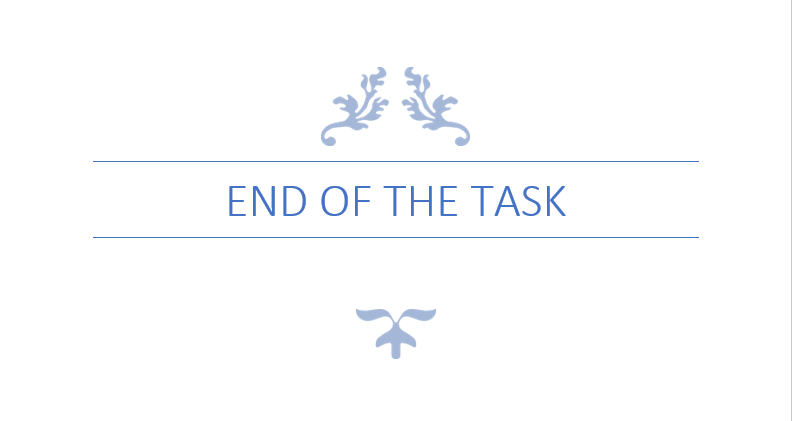